In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from uszipcode import ZipcodeSearchEngine
from geopy.geocoders import Nominatim

import pandas as pd
import seaborn.apionly as sns
from datetime import date, datetime
from haversine import haversine

# statistics package
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# packages for mapping
from mpl_toolkits.basemap import Basemap

# packages for interactive graphs
from ipywidgets import widgets, interact
from IPython.display import display
from copy import deepcopy as copy
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,...,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,payment_type,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,...,40.757977,-73.989838,40.751171,6.5,CSH,0.0,0.5,0.0,0.0,7.0
1,1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,...,40.731781,-73.994499,40.750660,6.0,CSH,0.5,0.5,0.0,0.0,7.0
2,2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,...,40.737770,-74.009834,40.726002,5.5,CSH,1.0,0.5,0.0,0.0,7.0
3,3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,...,40.759945,-73.984734,40.759388,5.0,CSH,0.5,0.5,0.0,0.0,6.0
4,4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,...,40.748528,-74.002586,40.747868,9.5,CSH,0.5,0.5,0.0,0.0,10.5
5,5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,...,40.764252,-73.983322,40.743763,9.5,CSH,0.0,0.5,0.0,0.0,10.0
6,6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,N,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,...,40.743977,-74.007416,40.744343,6.0,CSH,0.0,0.5,0.0,0.0,6.5
7,7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,N,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,...,40.756775,-73.865250,40.770630,34.0,CSH,0.0,0.5,0.0,4.8,39.3
8,8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,N,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,...,40.743137,-73.982712,40.735336,5.5,CSH,1.0,0.5,0.0,0.0,7.0
9,9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,N,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,...,40.786983,-73.952919,40.806370,13.0,CSH,0.0,0.5,0.0,0.0,13.5


In [4]:
def data_distribution(data):
    """ Draws a chart showing data distribution
        by combining an histogram and a boxplot
        
    Parameters
    ----------
    data: array or series
        the data to draw the distribution for
        
    """
    
    x = np.array(data)
    
    # set the number of bins using the Rice rule
    # n_bins = twice cube root of number of observations
    n = len(x)
    n_bins = round(2 * n**(1/3))
    
    fig = plt.figure()
    
    # histogram
    ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])
    ax1 = plt.hist(x, bins=n_bins, alpha=0.7)
    plt.grid(alpha=.5)
    
    # boxplot
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.2])
    ax2 = plt.boxplot(x, vert=False, widths=0.7)
    plt.grid(alpha=.5)
           
    plt.show()

In [5]:
def distance(lat1, lon1, lat2, lon2):
    """calculates the Manhattan distance between 2 points
        using their coordinates
    
    Parameters
    ----------
    lat1: float
        latitude of first point
        
    lon1: float
        longitude of first point
        
    lat2: float
        latitude of second point
    
    lon2: float
        longitude of second point
        
    Returns
    -------
    d: float
        The Manhattan distance between the two points in kilometers
        
    """
    
    d = haversine((lat1, lon1), (lat2, lon1)) + haversine((lat2, lon1), (lat2, lon2))
    return d

In [6]:
train_data["pickup_datetime"] = pd.to_datetime(train_data["pickup_datetime"])
train_data["dropoff_datetime"] = pd.to_datetime(train_data["dropoff_datetime"])

In [7]:
df=train_data.loc[0:100000,]
del df['Unnamed: 0']
df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,payment_type,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.00,...,40.757977,-73.989838,40.751171,6.5,CSH,0.0,0.5,0.00,0.0,7.00
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.50,...,40.731781,-73.994499,40.750660,6.0,CSH,0.5,0.5,0.00,0.0,7.00
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.10,...,40.737770,-74.009834,40.726002,5.5,CSH,1.0,0.5,0.00,0.0,7.00
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.70,...,40.759945,-73.984734,40.759388,5.0,CSH,0.5,0.5,0.00,0.0,6.00
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.10,...,40.748528,-74.002586,40.747868,9.5,CSH,0.5,0.5,0.00,0.0,10.50
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,1.70,...,40.764252,-73.983322,40.743763,9.5,CSH,0.0,0.5,0.00,0.0,10.00
6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,N,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,0.80,...,40.743977,-74.007416,40.744343,6.0,CSH,0.0,0.5,0.00,0.0,6.50
7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,N,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,10.70,...,40.756775,-73.865250,40.770630,34.0,CSH,0.0,0.5,0.00,4.8,39.30
8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,N,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,0.80,...,40.743137,-73.982712,40.735336,5.5,CSH,1.0,0.5,0.00,0.0,7.00
9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,N,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,2.50,...,40.786983,-73.952919,40.806370,13.0,CSH,0.0,0.5,0.00,0.0,13.50


In [8]:
df["pickup_day"] = df["pickup_datetime"].apply(lambda x: x.day)
df["pickup_weekday"] = df["pickup_datetime"].apply(lambda x: x.weekday())
df["pickup_hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["pickup_minute"] = df["pickup_datetime"].apply(lambda x: x.minute)
df["pickup_time"] = df["pickup_hour"] + (df["pickup_minute"] / 60)

df["dropoff_hour"] = df["dropoff_datetime"].apply(lambda x: x.hour)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:
df.keys()

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'payment_type', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_day',
       'pickup_weekday', 'pickup_hour', 'pickup_minute', 'pickup_time',
       'dropoff_hour'],
      dtype='object')

In [10]:
# The distance is calculated in kilometers
df["distance"] = df.apply(lambda row: distance(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
# The speed is calculated in km/h
df["speed"] = df["distance"] / (df["trip_time_in_secs"] / 3600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
flags = {"N":0, "Y":1}
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map(flags)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df["trip_time_in_secs"].describe()

count    100001.000000
mean        650.634524
std         469.562801
min           0.000000
25%         360.000000
50%         540.000000
75%         840.000000
max        9180.000000
Name: trip_time_in_secs, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


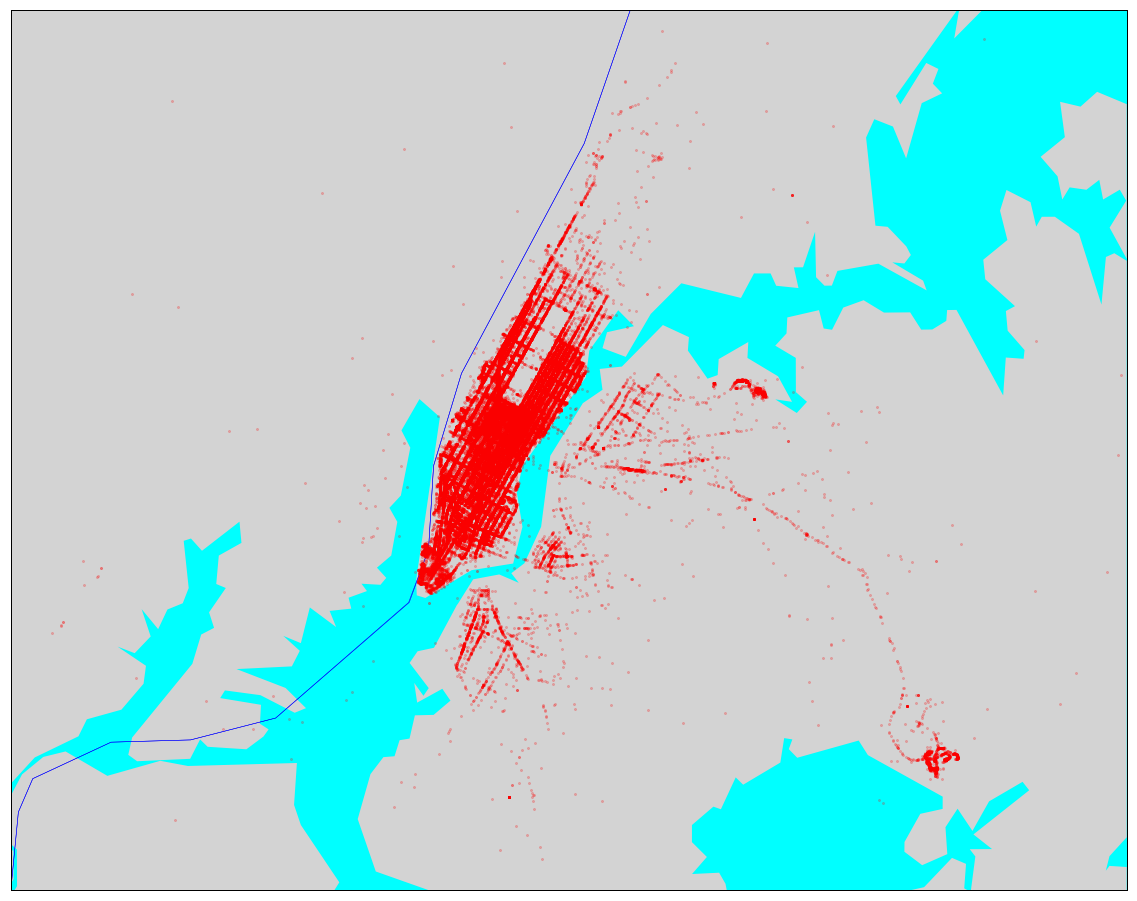

In [14]:
plt.figure(figsize=(20,20))

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.6
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
             resolution='h', projection='tmerc', lat_0 = cent_lat, lon_0 = cent_lon)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='lightgray', lake_color='aqua')
map.drawcountries(linewidth=2)
map.drawstates(color='b')

long = np.array(df["pickup_longitude"])
lat = np.array(df["pickup_latitude"])
t= np.array(df["total_amount"])
#print(t)

x, y = map(long, lat)
map.plot(x, y,'ro', markersize=2, alpha=0.2)

plt.show()

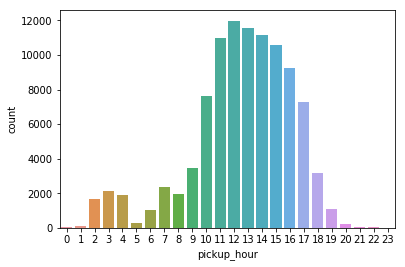

In [15]:
sns.countplot(df["pickup_hour"])

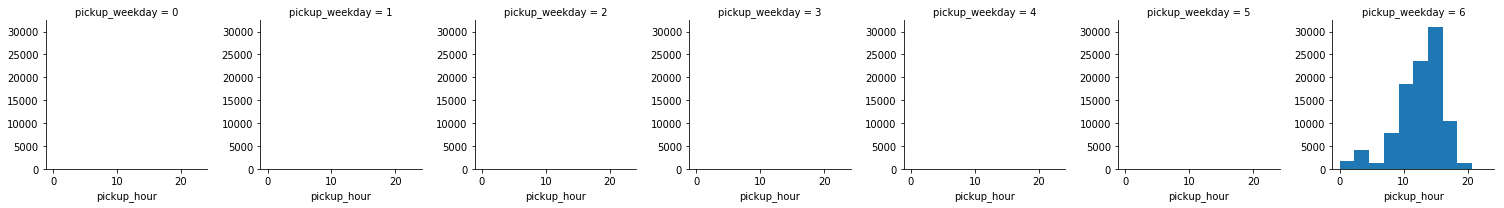

In [16]:
g = sns.FacetGrid(df, col="pickup_weekday")
g.map(plt.hist, "pickup_hour");

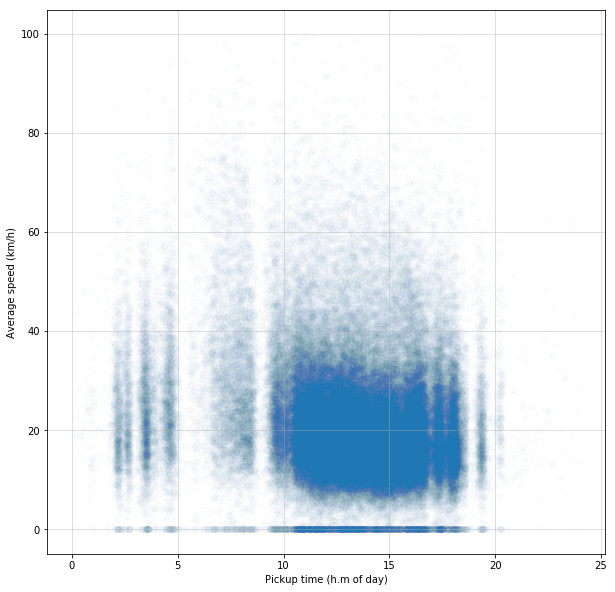

In [17]:
fig = plt.figure(figsize=(10,10))

x = df["pickup_time"][df["speed"] < 100]
y = df["speed"][df["speed"] < 100]

plt.scatter(x=x, y=y, alpha=0.01)

plt.xlabel("Pickup time (h.m of day)")
plt.ylabel("Average speed (km/h)")
plt.grid(alpha=0.5)
plt.show()

In [18]:
# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.6
lat_max = 40.9
lon_min = -74.05
lon_max = -73.75

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

columns = ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude", "pickup_hour"]
sample = df[columns][(df["pickup_latitude"] >= lat_min) & \
                      (df["pickup_latitude"] <= lat_max) & \
                      (df["pickup_longitude"] >= lon_min) & \
                      (df["pickup_longitude"] <= lon_max) & \
                      (df["speed"] >= 10) & \
                      (df["speed"] <= 60)]


def draw_map(hour):
    fig = plt.figure(figsize=(20, 20))
    
    # plot pickups
    ax = fig.add_subplot(121)
    ax.set_title("Pickups")
    
    # map definition
    map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
                resolution='h', projection='tmerc', lat_0 = cent_lat, lon_0 = cent_lon)

    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='lightgray', lake_color='aqua')
    
    lon = np.array(sample["pickup_longitude"][sample["pickup_hour"] == hour])
    lat = np.array(sample["pickup_latitude"][sample["pickup_hour"] == hour])
    x, y = map(lon, lat)
    map.plot(x, y,'bo', markersize=1, alpha=0.3)

    # plot dropoffs
    ax = fig.add_subplot(122)
    ax.set_title("Dropoffs")
    
    # map definition
    map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
                resolution='h', projection='tmerc', lat_0 = cent_lat, lon_0 = cent_lon)

    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='lightgray', lake_color='aqua')
    
    lon = np.array(sample["dropoff_longitude"][sample["pickup_hour"] == hour])
    lat = np.array(sample["dropoff_latitude"][sample["pickup_hour"] == hour])
    x, y = map(lon, lat)
    map.plot(x, y,'ro', markersize=1, alpha=0.3)

    plt.show()

interact(draw_map, hour=widgets.IntSlider(min=0,max=23,step=1,value=12))

A Jupyter Widget

<function __main__.draw_map>

In [19]:
df.keys()

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'payment_type', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_day',
       'pickup_weekday', 'pickup_hour', 'pickup_minute', 'pickup_time',
       'dropoff_hour', 'distance', 'speed'],
      dtype='object')

In [20]:
search = ZipcodeSearchEngine()

In [21]:
# raw_trip_fare = pd.read_csv('trip_fare_1.csv')
# raw_trip_fare.head()

In [22]:
# raw_trip_fare.keys()

In [100]:
# trip = raw_trip_fare
trip = copy(df)
# trip.columns = ['medallion', 'hack_license',  'vendor_id', 'pickup_datetime', 'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']
# trip.loc[:,('pickup_datetime')] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in trip['pickup_datetime']]

In [101]:
trip.keys()

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'payment_type', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_day',
       'pickup_weekday', 'pickup_hour', 'pickup_minute', 'pickup_time',
       'dropoff_hour', 'distance', 'speed'],
      dtype='object')

In [102]:
car_wise_trip = trip[trip['hack_license']=='BA96DE419E711691B9445D6A6307C170']
single_day_trip = car_wise_trip[car_wise_trip['pickup_datetime'] >= datetime.strptime('2013-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')]
single_day_trip = single_day_trip[single_day_trip['pickup_datetime'] < datetime.strptime('2013-01-02 00:00:00', '%Y-%m-%d %H:%M:%S')]
single_day_trip.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,tolls_amount,total_amount,pickup_day,pickup_weekday,pickup_hour,pickup_minute,pickup_time,dropoff_hour,distance,speed
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,0.0,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,0.0,7.0,1,1,15,11,15.183333,15,1.740078,16.398644


In [103]:
# raw_trip_data = pd.read_csv('trip_data/trip_data_1.csv')
# raw_trip_data.head()
raw_trip_data = copy(df)

In [105]:
# trip_data = raw_trip_data.loc[0:1000,]
# trip_data['pickup_date'] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in trip_data['pickup_datetime']]
# trip_data['dropoff_date'] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in trip_data['dropoff_datetime']]
# trip_data.loc[:,('pickup_datetime')] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in trip_data['pickup_datetime']]
# trip_data.loc[:,('dropoff_datetime')] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in trip_data['dropoff_datetime']]
trip_data = raw_trip_data
trip_data['pickup_date'] = [date.date() for date in trip_data['pickup_datetime']]
trip_data['dropoff_date'] = [date.date() for date in trip_data['dropoff_datetime']]
trip_data.loc[:,('pickup_datetime')] = [date for date in trip_data['pickup_datetime']]
trip_data.loc[:,('dropoff_datetime')] = [date for date in trip_data['dropoff_datetime']]
trip_data['zip_code'] = None
trip_data.keys()

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'payment_type', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_day',
       'pickup_weekday', 'pickup_hour', 'pickup_minute', 'pickup_time',
       'dropoff_hour', 'distance', 'speed', 'pickup_date', 'dropoff_date',
       'zip_code'],
      dtype='object')

In [106]:
pickup_datetime = trip_data['pickup_datetime']
time_inteval = []
for i in range(pickup_datetime.size):
    hour = pickup_datetime[i].hour
    if hour>5 and hour<18:
        time_inteval.append('Day')
    else:
        time_inteval.append('Night')
trip_data['time_inteval'] = time_inteval

In [107]:
geolocator = Nominatim()
longtitude = trip_data['pickup_longitude']
latitude = trip_data['pickup_latitude']
dropoff_longitude = trip_data['dropoff_longitude']
dropoff_latitude = trip_data['dropoff_latitude']
zip_codes =[]
dropoff_zip_codes =[]
for i in range(longtitude.size):
    res = search.by_coordinate(latitude[i], longtitude[i], radius=0.2, returns=0.2)
    dropoff_res = search.by_coordinate(dropoff_latitude[i], dropoff_longitude[i], radius=0.2, returns=0.2)
    if(len(res) > 0):
        address = res[0]
        zip_codes.append(address['Zipcode'])
    else:
        zip_codes.append('NA')
    if(len(dropoff_res) > 0):
        address = dropoff_res[0]
        dropoff_zip_codes.append(address['Zipcode'])
    else:
        dropoff_zip_codes.append('NA')
trip_data['zip_code'] = zip_codes
trip_data['dropoff_zip_codes'] = dropoff_zip_codes

In [108]:
trip_data = trip_data[trip_data['zip_code'] != 'NA']
trip_data = trip_data[trip_data['dropoff_zip_codes'] != 'NA']
trip_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_minute,pickup_time,dropoff_hour,distance,speed,pickup_date,dropoff_date,zip_code,time_inteval,dropoff_zip_codes
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0.0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,54,23.900000,23,0.915308,13.504548,2013-01-07,2013-01-07,10154,Night,10020
14,3349F919AA8AE5DC9C50A3773EA45BD8,7CE849FEF67514F080AF80D990F7EF7F,CMT,1,0.0,2013-01-10 15:42:29,2013-01-10 16:04:02,1,1293,3.2,...,42,15.700000,16,6.235736,17.361679,2013-01-10,2013-01-10,10012,Day,10022
30,F1EF8290A54338B1396DD98E38E09143,0FDDEFAFF6FC38BD632B6DDED47DA618,CMT,1,0.0,2013-01-05 08:16:58,2013-01-05 08:30:20,1,801,6.5,...,16,8.266667,8,11.585282,52.068685,2013-01-05,2013-01-05,11217,Day,11104
35,2C159C8FCCDE50174CF6CFC07E75F1BA,51C567531541EE45C5EE86E956E46E4C,CMT,1,0.0,2013-01-07 04:45:14,2013-01-07 04:48:56,1,222,0.9,...,45,4.750000,4,1.316655,21.351155,2013-01-07,2013-01-07,10119,Night,10165
38,CD9DEF073BAB75B8B36015D85FD3F777,80430F0667E3C82E63AAF4F0DC547664,CMT,1,0.0,2013-01-05 03:20:28,2013-01-05 03:43:36,4,1387,11.2,...,20,3.333333,3,15.230955,39.532398,2013-01-05,2013-01-05,10119,Night,11204


In [109]:
res = search.by_coordinate(40.757977, -73.978165, radius=0.2, returns=0.2)
res[0]

{"City": "New York", "Density": null, "HouseOfUnits": 0, "LandArea": 0.0, "Latitude": 40.7591267, "Longitude": -73.97767689999998, "NEBoundLatitude": 40.7596891, "NEBoundLongitude": -73.976744, "Population": 0, "SWBoundLatitude": 40.75839819999999, "SWBoungLongitude": -73.97879820000001, "State": "NY", "TotalWages": 187418116.0, "WaterArea": 0.0, "Wealthy": Infinity, "Zipcode": "10111", "ZipcodeType": "Standard"}

In [115]:
# revenue = trip.loc[0:1000,]['total_amount']
trip_and_fare = copy(trip_data)
# trip_and_fare['total_amount'] = revenue
trip_and_fare = trip_and_fare[trip_and_fare['zip_code'] != 'NA']

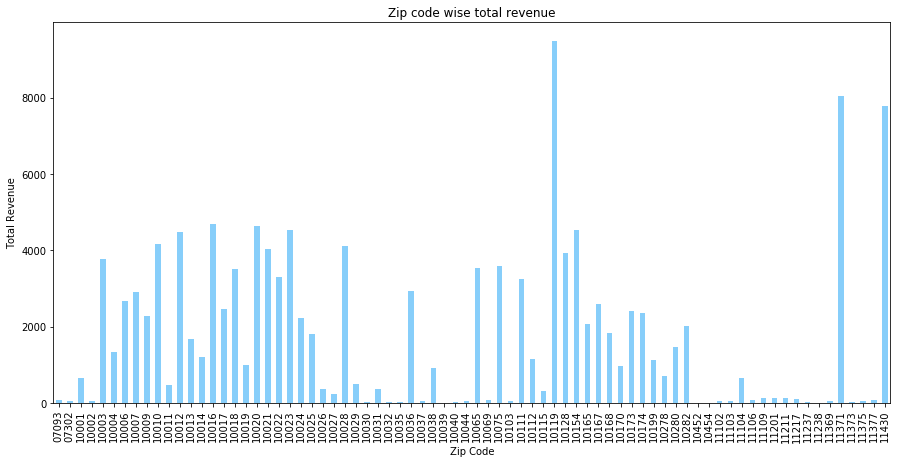

In [116]:
zip_wise_revenue = trip_and_fare.groupby(['zip_code']).sum()['total_amount']
zip_wise_revenue = zip_wise_revenue.sort_index()
zip_wise_revenue.plot(kind = 'bar', figsize=(15, 7), title='Zip code wise total revenue', color='lightskyblue')
plt.xlabel('Zip Code')
plt.ylabel('Total Revenue')
plt.show()

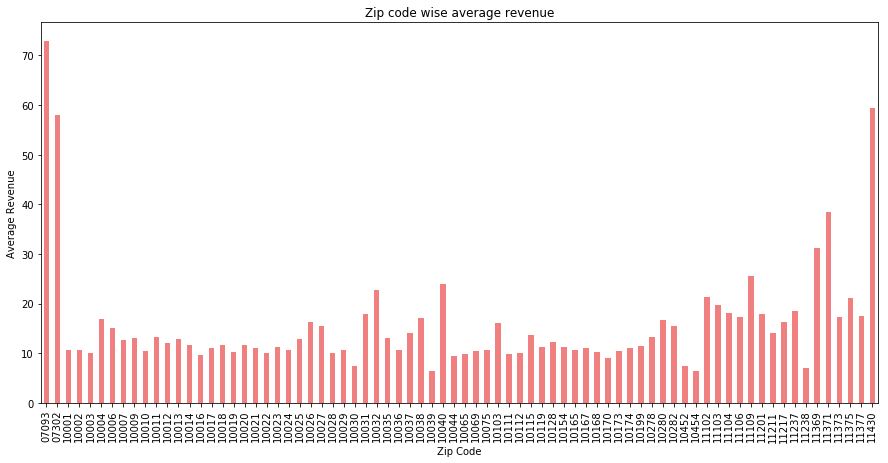

In [117]:
zip_wise_average_revenue = trip_and_fare.groupby(['zip_code']).mean()['total_amount']
zip_wise_average_revenue = zip_wise_average_revenue.sort_index()
zip_wise_average_revenue.plot(kind = 'bar', figsize=(15, 7), title='Zip code wise average revenue', color='lightcoral')
plt.xlabel('Zip Code')
plt.ylabel('Average Revenue')
plt.show()

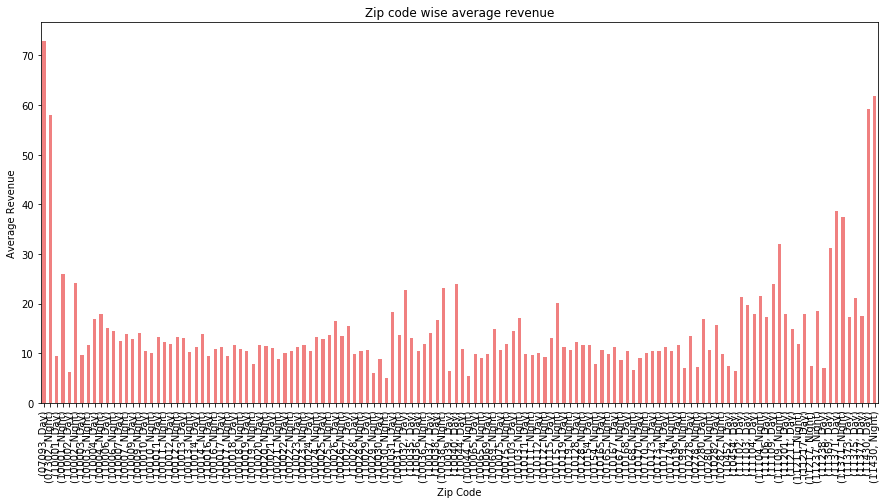

In [118]:
zip_and_interval_wise_average_revenue = trip_and_fare.groupby(['zip_code', 'time_inteval']).mean()['total_amount']
zip_and_interval_wise_average_revenue = zip_and_interval_wise_average_revenue.sort_index()
zip_and_interval_wise_average_revenue.plot(kind = 'bar', figsize=(15, 7), title='Zip code wise average revenue', color='lightcoral')
plt.xlabel('Zip Code')
plt.ylabel('Average Revenue')
plt.show()

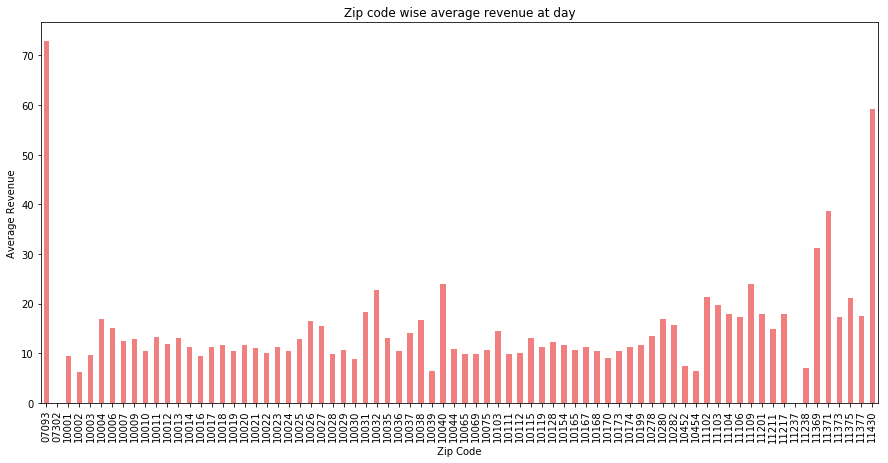

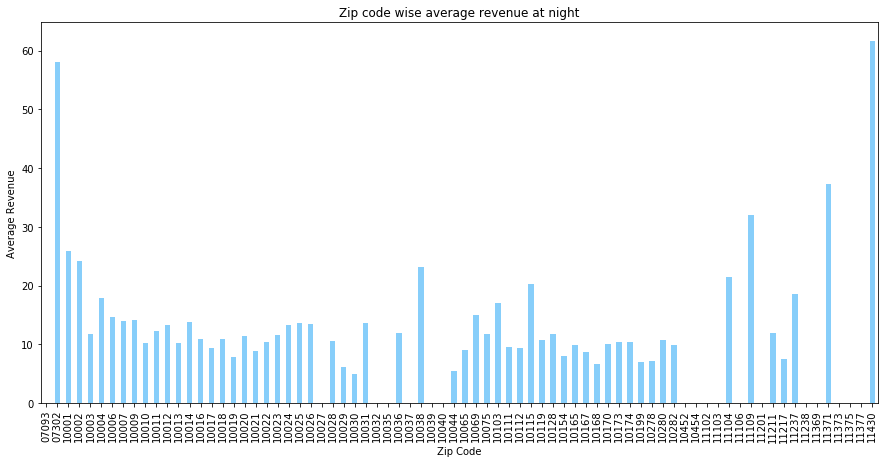

In [119]:
tmp = zip_and_interval_wise_average_revenue.unstack()
revenue_at_day = tmp['Day']
revenue_at_night = tmp['Night']
revenue_at_day.plot(kind = 'bar', figsize=(15, 7), title='Zip code wise average revenue at day', color='lightcoral')
plt.xlabel('Zip Code')
plt.ylabel('Average Revenue')
plt.show()

revenue_at_night.plot(kind = 'bar', figsize=(15, 7), title='Zip code wise average revenue at night', color='lightskyblue')
plt.xlabel('Zip Code')
plt.ylabel('Average Revenue')
plt.show()


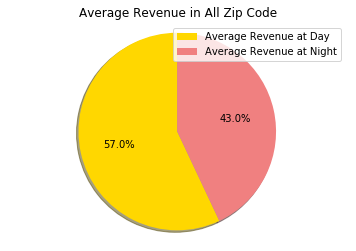

In [120]:
labels = 'Average Revenue at Day', 'Average Revenue at Night'
interval = [0,0]
interval[0] =  revenue_at_day.sum()
interval[1] = revenue_at_night.sum()
colors = ['gold', 'lightcoral']
explode = (0,0)  
 
# We are going to plot the percentage of applications certified, certified-withdrawn, denied and withdrawn

pie = plt.pie(interval, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(pie[0], labels, loc="best")
plt.title('Average Revenue in All Zip Code')
 
plt.axis('equal')
plt.show()

In [121]:
zip_sate = trip_and_fare['zip_code'].unique()
len(zip_sate)

76

In [122]:
trip_and_fare

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_minute,pickup_time,dropoff_hour,distance,speed,pickup_date,dropoff_date,zip_code,time_inteval,dropoff_zip_codes
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,0.0,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.70,...,54,23.900000,23,0.915308,13.504548,2013-01-07,2013-01-07,10154,Night,10020
14,3349F919AA8AE5DC9C50A3773EA45BD8,7CE849FEF67514F080AF80D990F7EF7F,CMT,1,0.0,2013-01-10 15:42:29,2013-01-10 16:04:02,1,1293,3.20,...,42,15.700000,16,6.235736,17.361679,2013-01-10,2013-01-10,10012,Day,10022
30,F1EF8290A54338B1396DD98E38E09143,0FDDEFAFF6FC38BD632B6DDED47DA618,CMT,1,0.0,2013-01-05 08:16:58,2013-01-05 08:30:20,1,801,6.50,...,16,8.266667,8,11.585282,52.068685,2013-01-05,2013-01-05,11217,Day,11104
35,2C159C8FCCDE50174CF6CFC07E75F1BA,51C567531541EE45C5EE86E956E46E4C,CMT,1,0.0,2013-01-07 04:45:14,2013-01-07 04:48:56,1,222,0.90,...,45,4.750000,4,1.316655,21.351155,2013-01-07,2013-01-07,10119,Night,10165
38,CD9DEF073BAB75B8B36015D85FD3F777,80430F0667E3C82E63AAF4F0DC547664,CMT,1,0.0,2013-01-05 03:20:28,2013-01-05 03:43:36,4,1387,11.20,...,20,3.333333,3,15.230955,39.532398,2013-01-05,2013-01-05,10119,Night,11204
47,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,0.0,2013-01-07 14:38:35,2013-01-07 14:46:13,1,457,0.60,...,38,14.633333,14,0.959178,7.555889,2013-01-07,2013-01-07,10018,Day,10020
53,FAE1370A694D0621FAE1E62FAFD64080,265B3D7D30A9B7AE389A2626F6825266,CMT,1,0.0,2013-01-07 10:15:19,2013-01-07 10:20:10,1,290,1.00,...,15,10.250000,10,1.844406,22.896074,2013-01-07,2013-01-07,10021,Day,10022
61,1836E1591EE79F810104064B945747AB,18EDD3FC80A78DC262E2442FEEA55F01,CMT,1,0.0,2013-01-08 01:15:53,2013-01-08 01:23:09,1,435,1.90,...,15,1.250000,1,2.410788,19.951345,2013-01-08,2013-01-08,10036,Night,10022
106,5E162F2D7F569949769648C56A23C525,6F7932F2B112DAABF1F2A385FE2AB819,CMT,1,0.0,2013-01-08 03:13:19,2013-01-08 03:34:17,1,1258,9.10,...,13,3.216667,3,12.519090,35.825694,2013-01-08,2013-01-08,10001,Night,11371
113,CD847FE5884F10A28217E9FBA11B275B,5FEFD00D9773268B72EE4E879852F190,CMT,1,0.0,2013-01-08 11:20:30,2013-01-08 11:38:54,1,1104,2.00,...,20,11.333333,11,1.952476,6.366768,2013-01-08,2013-01-08,10119,Day,10017


In [174]:
class TaxiWorld():
    def __init__(self):
        self.reward = dict()
        self.count = dict()
        self.s = None
        self.actions = [0,1]
        self.a = 0
        self.zip_codes = []
        
    def initialize(self, data):
        self.zip_codes = trip_and_fare['zip_code'].unique()
        for index,row in data.T.iteritems():
            key = row['zip_code'] + '-' + row['dropoff_zip_codes']
            if key not in self.reward:
                self.reward[key] = row['total_amount']
                self.count[key] = 1
            else:
                self.reward[key] = ((self.reward[key]*self.count[key]) + row['total_amount'])/(self.count[key] + 1)
                self.count[key] += 1
                
    def getReward(self, zip_code, dropoff_zip_code):
        key = zip_code + '-' + dropoff_zip_code
        if key not in self.reward:
                return 0
        else:
            return self.reward[key]
    
    def getState(self):
        print('Current State')
        return self.s
    
    def setState(self, s):
        self.s = s
        
    def getStateSize(self, trip_and_fare):
        return len(trip_and_fare['zip_code'].unique())
    
    def getZipCodes(self, trip_and_fare):
        return self.zip_codes
    
    def getActionSize(self):
        return len(self.actions)

    def nextAction(self, s):
        print('Calculate Next Action based on state')
        
    def check_Q_table(self, s):
        if s not in self.Q:
            self.Q[s] = dict((action, 0.0) for action in self.actions)
            


In [178]:
env = TaxiWorld()

In [181]:
class TaxiRevenue:
    def __init__(self, env):
        self.env = env
        self.size = env.getStateSize()
        self.actionsize = env.getActionSize()
        self.Q = np.zeros((24, self.size))
    
    def greedy(self, s):
        return np.argmax(self.Q[s[0]]) 

    def epsilon_greed(self, epsilon, s):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return self.greedy(s)
        
    def train(self, trip_and_fare):
        self.env.initializeReward(trip_and_fare)
        
    def test(self):
        return self.env.getState()

(24, 10)

In [180]:
texiRevenue = TaxiRevenue(env)
texiRevenue.train(trip_and_fare)
texiRevenue.test()

Current State


In [86]:
list(range(2))

[0, 1]